In [9]:
from tensorflow import  keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.layers import Dropout, BatchNormalization
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

import random

In [2]:
(X_train, y_train),(X_test, y_test) =  keras.datasets.fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [3]:
y_test

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

In [4]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

class_label = dict(zip(range(10), class_names))
class_label

{0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'}

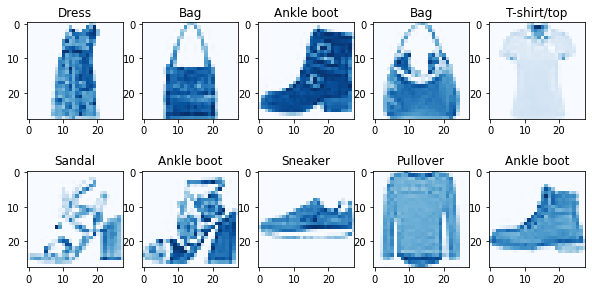

In [5]:
# Display 10 random images from the Fashion MNIST data set and annotate the image with the class label.
fig, axs = plt.subplots(2, 5, figsize=(10,5))

for i in range(10):
    n = random.randint(0, len(X_test))
    image = X_test[n]
    label = y_test[n]
    ax = axs[i//5, i%5]
    ax.set_title(class_label.get(label))
    ax.imshow(image, cmap='Blues') # show the plot of this array using blue pallete.

plt.show()

## Build, train and evaluate a neural network that is able to classify these images with high accuracy

In [6]:
X_train.shape

(60000, 28, 28)

In [7]:
net = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(X_train.shape[1] , X_train.shape[2])),
    # add layers here  
])
net.output_shape

(None, 784)

In [10]:
from tensorflow.keras.metrics import AUC

num_input_units = X_train.shape[1] * X_train.shape[2]
num_hidden_n1 = 90
num_hidden_n2 = 64
num_classes = len(class_label)

net = Sequential()

net.add(Flatten(input_shape=(X_train.shape[1] , X_train.shape[2])))

#first hidden layer
net.add(Dense(num_hidden_n1, kernel_initializer='normal', activation='relu'))
net.add(BatchNormalization())
net.add(Dropout(0.3))
# second hidden layer
net.add(Dense(num_hidden_n2, kernel_initializer='normal', activation='relu'))
net.add(Dropout(0.3))

#output layer
net.add(Dense(num_classes, kernel_initializer='normal', activation='softmax'))

#net.build(input_shape=(1,num_input_units))
#net.output_shape

net.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 90)                70650     
_________________________________________________________________
batch_normalization (BatchNo (None, 90)                360       
_________________________________________________________________
dropout (Dropout)            (None, 90)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                5824      
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

In [11]:
optimizer = 'adam'

#OR 
#from keras import optimizers
# there are many more parameters that we could be adding here
# optimizer = keras.optimizers.SGD(lr=0.01, decay=0.1, momentum=0.1)
# learning rate is set in the optimizer
# learning rates 0.1,0.01,0.001 are good values to test and start with

# Compile model
net.compile(loss='categorical_crossentropy', # loss function is defined by the task 
                  optimizer=optimizer,
                  metrics=['accuracy', AUC()])

In [12]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

In [13]:
from tensorflow.keras.utils import to_categorical

y_train_enc = to_categorical(y_train, num_classes)
y_test_enc = to_categorical(y_test, num_classes)

In [14]:
history = net.fit(  X_train,
          y_train_enc,
          epochs=25,
          batch_size=200, # if unspecified defaulted to 32
          verbose=1,
          validation_data=(X_test, y_test_enc) #OR validation_split=0.3 
          )

scores = net.evaluate(X_test, y_test_enc, verbose=1)
print("Error Rate: %.2f%%" % (100-scores[1]*100))

Epoch 1/25
300/300 [==============================] - 5s 13ms/step - loss: 1.0722 - accuracy: 0.6738 - auc: 0.9389 - val_loss: 0.4454 - val_accuracy: 0.8375 - val_auc: 0.9875
Epoch 2/25
300/300 [==============================] - 3s 12ms/step - loss: 0.4623 - accuracy: 0.8363 - auc: 0.9868 - val_loss: 0.4303 - val_accuracy: 0.8456 - val_auc: 0.9880
Epoch 3/25
300/300 [==============================] - 3s 11ms/step - loss: 0.4329 - accuracy: 0.8474 - auc: 0.9881 - val_loss: 0.3964 - val_accuracy: 0.8560 - val_auc: 0.9896
Epoch 4/25
300/300 [==============================] - 4s 12ms/step - loss: 0.4097 - accuracy: 0.8536 - auc: 0.9891 - val_loss: 0.4133 - val_accuracy: 0.8522 - val_auc: 0.9892
Epoch 5/25
300/300 [==============================] - 3s 12ms/step - loss: 0.3791 - accuracy: 0.8646 - auc: 0.9905 - val_loss: 0.3939 - val_accuracy: 0.8591 - val_auc: 0.9896
Epoch 6/25
300/300 [==============================] - 4s 12ms/step - loss: 0.3838 - accuracy: 0.8619 - auc: 0.9902 - val_loss

In [15]:
scores

[0.3806562125682831, 0.8744000196456909, 0.990720272064209]

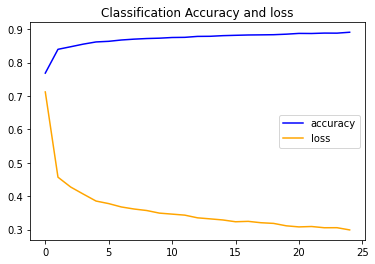

In [16]:
from tensorflow.python.keras.callbacks import History

def plot_training_history(history: History):
    plt.title('Classification Accuracy and loss')
    plt.plot(history.history['accuracy'], color='blue', label='accuracy')
    plt.plot(history.history['loss'], color='orange', label='loss')
    plt.legend()
    plt.show()

def plot_training_history1(history: History):
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='validation')
    plt.legend()
    plt.show()

plot_training_history(history)

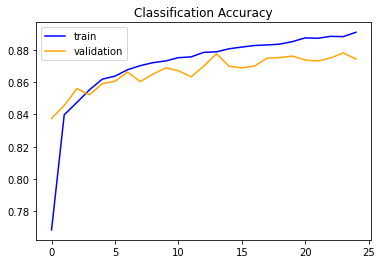

In [17]:
plot_training_history1(history)

In [18]:
yhat = net.predict(X_test)

# Finding the most probable class
yhat_c = np.argmax(yhat, axis=1)

yhat_c

array([9, 2, 1, ..., 8, 1, 5])

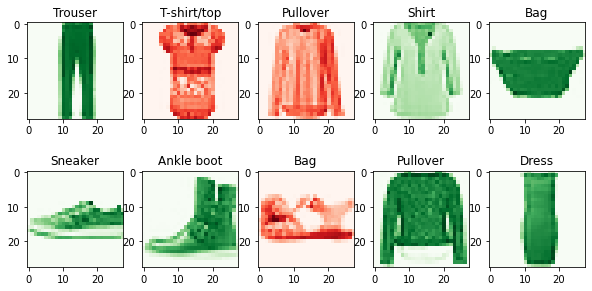

In [32]:
# Display 10 random images from the Fashion MNIST data set and annotate the image with the class label.
fig, axs = plt.subplots(2, 5, figsize=(10,5))

for i in range(10):
    n = random.randint(0, len(X_test))
    image = X_test[n]
    label_pred = yhat_c[n]
    label_true = y_test[n]
    if(label_pred==label_true):
        color ='Greens'
    else:
        color = 'Reds'
    ax = axs[i//5, i%5]
    ax.set_title(class_label.get(label_pred))
    ax.imshow(image, cmap=color) # show the plot of this array using blue pallete.

plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=a109ea11-a7da-42aa-8af0-3a0cdafc917e' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>